In [2]:
import pandas as pd
from enron_preprocess import merged_enron
import sys
sys.path.append("../Handlers")

from traintest import ConvolutionalNNClassifier, RecurrentNNClassifier, ArtificialNNClassifier

In [3]:
merged_enron

,Subject,Body,Label
0,christmas tree farm pictures\n,NaN,0
1,"vastar resources , inc .\n","gary , production from the high island larger ...",0
2,calpine daily gas nomination\n,- calpine daily gas nomination 1 . doc,0
3,re : issue\n,fyi - see note below - already done .\n\nstell...,0
4,meter 7268 nov allocation\n,fyi .\n\n- - - - - - - - - - - - - - - - - - -...,0
...,...,...,...
33710,= ? iso - 8859 - 1 ? q ? good _ news _ c = ed...,"hello , welcome to gigapharm onlinne shop .\n\...",1
33711,all prescript medicines are on special . to b...,i got it earlier than expected and it was wrap...,1
33712,the next generation online pharmacy .\n,are you ready to rock on ? let the man in you ...,1
33713,bloow in 5 - 10 times the time\n,learn how to last 5 - 10 times longer in\n\nbe...,1


In [5]:
merged_enron_X = merged_enron.apply(lambda x: f"{x['Subject']} {x['Body']}", axis=1)
merged_enron_y = merged_enron["Label"]

In [8]:
cnn = ConvolutionalNNClassifier("merged_enron", input_length=200)
cnn.load_data(merged_enron_X, merged_enron_y)
cnn.split(test_size=0.1, valid_size=0.1)
cnn.vectorizing()

Shape of the input data is (26971, 200)


<tf.Tensor: shape=(26971, 200), dtype=int64, numpy=
array([[1287,  858,  758, ...,    0,    0,    0],
       [3993,  588, 2878, ...,    0,    0,    0],
       [4621,  241,   89, ...,    0,    0,    0],
       ...,
       [2427,    0,    0, ...,    0,    0,    0],
       [   1,  567,    1, ...,    0,    0,    0],
       [ 292, 1095,    9, ...,    0,    0,    0]], dtype=int64)>

In [9]:
cnn.build(
    dense_dropout=True, 
    dense_dropout_rate=0.4, 
    epochs=20,
    conv_layer_num=3,
    num_filters=[256, 128, 64],
    kernel_sizes=[5, 5, 3],
    max_pooling=True,
    pooling_sizes=[2, 2, 0]
)

Epoch 1/20


e:\Python Tests\AI\.venv\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


843/843 ━━━━━━━━━━━━━━━━━━━━ 42s 48ms/step - accuracy: 0.8975 - loss: 0.2065 - precision: 0.8804 - recall: 0.9347 - val_accuracy: 0.9881 - val_loss: 0.0332 - val_precision: 0.9878 - val_recall: 0.9890
Epoch 2/20
843/843 ━━━━━━━━━━━━━━━━━━━━ 44s 53ms/step - accuracy: 0.9925 - loss: 0.0225 - precision: 0.9922 - recall: 0.9931 - val_accuracy: 0.9858 - val_loss: 0.0394 - val_precision: 0.9878 - val_recall: 0.9843
Epoch 3/20
843/843 ━━━━━━━━━━━━━━━━━━━━ 48s 56ms/step - accuracy: 0.9961 - loss: 0.0126 - precision: 0.9959 - recall: 0.9964 - val_accuracy: 0.9846 - val_loss: 0.0501 - val_precision: 0.9877 - val_recall: 0.9820
Epoch 4/20
843/843 ━━━━━━━━━━━━━━━━━━━━ 43s 51ms/step - accuracy: 0.9967 - loss: 0.0095 - precision: 0.9963 - recall: 0.9973 - val_accuracy: 0.9855 - val_loss: 0.0744 - val_precision: 0.9740 - val_recall: 0.9983
Epoch 5/20
843/843 ━━━━━━━━━━━━━━━━━━━━ 43s 51ms/step - accuracy: 0.9974 - loss: 0.0073 - precision: 0.9966 - recall: 0.9983 - val_accuracy: 0.9887 - val_loss: 0.0

CNN Merged Enron Classification Report


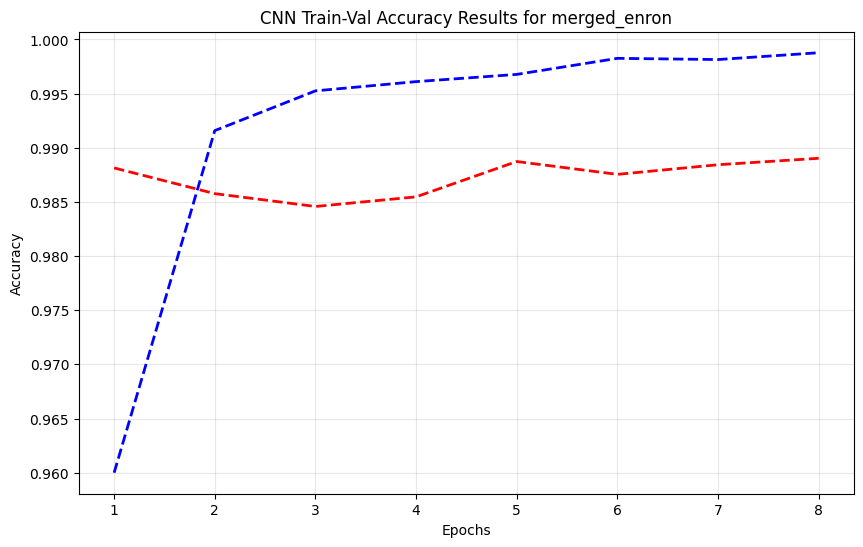

106/106 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step
{'dataset': 'merged_enron', 'model': 'CNN', 'metrics': {'accuracy': 0.986061684460261, 'weighted_precision': 0.9860627531263619, 'wighted_recall': 0.986061684460261, 'weighted_f1': 0.9860614379683282, 'macro_precision': 0.9860741522314403, 'macro_recall': 0.9860397695360174, 'macro_f1': 0.9860561794737677, 'roc_auc': 0.9860397695360174}, 'confusion_matrix': array([[1629,   25],
       [  22, 1696]], dtype=int64), 'epochs': 8}


In [10]:
metric_results = []

print("CNN Merged Enron Classification Report")
cnn.plot_training_validation_accuracy()
metrics = cnn.evaluate()
metric_results.append(metrics)
print(metrics)
del cnn

In [11]:
rnn = RecurrentNNClassifier("merged_enron", input_length=200)
rnn.load_data(merged_enron_X, merged_enron_y)
rnn.split(test_size=0.1, valid_size=0.1)
rnn.vectorizing()
rnn.build(
    hidden_layer_num=2,
    hidden_sizes=[128, 64],
    epochs=20,
    lstm=True
)

Shape of the input data is (26971, 200)
Epoch 1/20


e:\Python Tests\AI\.venv\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


843/843 ━━━━━━━━━━━━━━━━━━━━ 130s 151ms/step - accuracy: 0.6804 - loss: 0.5774 - precision: 0.6642 - recall: 0.7583 - val_accuracy: 0.8301 - val_loss: 0.4569 - val_precision: 0.8033 - val_recall: 0.8839
Epoch 2/20
843/843 ━━━━━━━━━━━━━━━━━━━━ 131s 155ms/step - accuracy: 0.8363 - loss: 0.4429 - precision: 0.8102 - recall: 0.8877 - val_accuracy: 0.8351 - val_loss: 0.4422 - val_precision: 0.8201 - val_recall: 0.8677
Epoch 3/20
843/843 ━━━━━━━━━━━━━━━━━━━━ 128s 152ms/step - accuracy: 0.8361 - loss: 0.4434 - precision: 0.8253 - recall: 0.8591 - val_accuracy: 0.8363 - val_loss: 0.4455 - val_precision: 0.8310 - val_recall: 0.8532
Epoch 4/20
843/843 ━━━━━━━━━━━━━━━━━━━━ 129s 153ms/step - accuracy: 0.8291 - loss: 0.4582 - precision: 0.8243 - recall: 0.8467 - val_accuracy: 0.8327 - val_loss: 0.4520 - val_precision: 0.8261 - val_recall: 0.8520
Epoch 5/20
843/843 ━━━━━━━━━━━━━━━━━━━━ 129s 153ms/step - accuracy: 0.8338 - loss: 0.4375 - precision: 0.8191 - recall: 0.8597 - val_accuracy: 0.9789 - val

CNN Merged Enron Classification Report


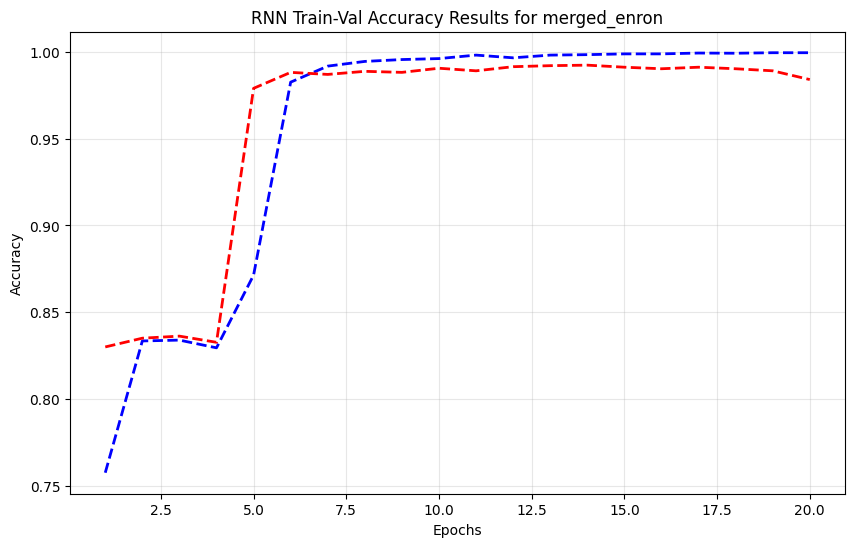

106/106 ━━━━━━━━━━━━━━━━━━━━ 6s 50ms/step
{'dataset': 'merged_enron', 'model': 'RNN', 'metrics': {'accuracy': 0.9872479240806643, 'weighted_precision': 0.9872670980050194, 'wighted_recall': 0.9872479240806643, 'weighted_f1': 0.9872469983714052, 'macro_precision': 0.9873228766940527, 'macro_recall': 0.9871813911454645, 'macro_f1': 0.9872416124266252, 'roc_auc': 0.9871813911454645}, 'confusion_matrix': array([[1627,   27],
       [  16, 1702]], dtype=int64), 'epochs': 20}


In [12]:
print("CNN Merged Enron Classification Report")
rnn.plot_training_validation_accuracy()
metrics = rnn.evaluate()
metric_results.append(metrics)
print(metrics)

In [13]:
ann = ArtificialNNClassifier("SpamAssassin")
ann.load_data(merged_enron_X, merged_enron_y)
ann.split(test_size=0.1, valid_size=0.1)
ann.vectorizing()
ann.build(
    hidden_layer_num=2,
    hidden_layer_sizes=[64, 64],
    epochs=20
)

Shape of the input data is (26971, 200)
Epoch 1/20
843/843 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9041 - loss: 0.2418 - precision: 0.8800 - recall: 0.9457 - val_accuracy: 0.9884 - val_loss: 0.0293 - val_precision: 0.9890 - val_recall: 0.9884
Epoch 2/20
843/843 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9959 - loss: 0.0146 - precision: 0.9949 - recall: 0.9972 - val_accuracy: 0.9890 - val_loss: 0.0268 - val_precision: 0.9924 - val_recall: 0.9861
Epoch 3/20
843/843 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9991 - loss: 0.0036 - precision: 0.9989 - recall: 0.9993 - val_accuracy: 0.9911 - val_loss: 0.0276 - val_precision: 0.9890 - val_recall: 0.9936
Epoch 4/20
843/843 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9996 - loss: 0.0016 - precision: 0.9995 - recall: 0.9997 - val_accuracy: 0.9932 - val_loss: 0.0302 - val_precision: 0.9908 - val_recall: 0.9959
Epoch 5/20
843/843 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 1.0000 - loss: 1.6946e-04 - precision: 1.0000 - recall: 

ANN Merged Enron Classification Report


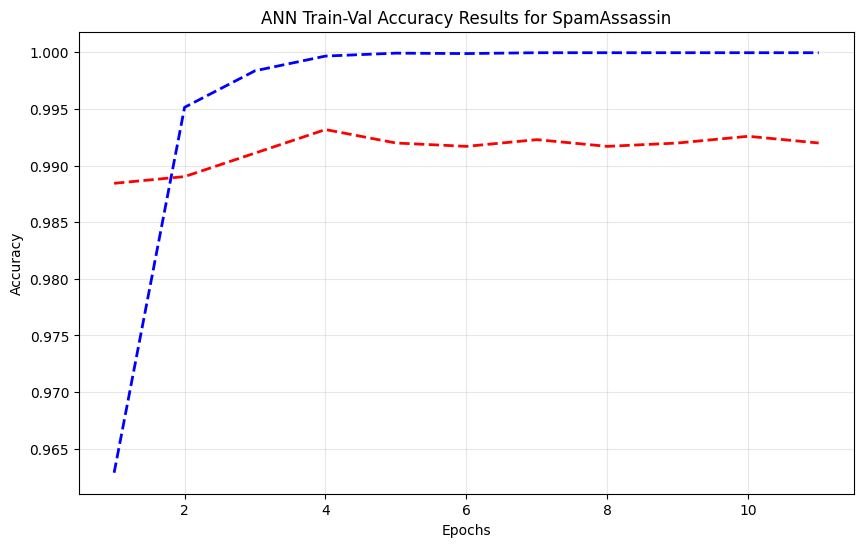

106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
{'dataset': 'SpamAssassin', 'model': 'ANN', 'metrics': {'accuracy': 0.9937722419928826, 'weighted_precision': 0.9937762359943364, 'wighted_recall': 0.9937722419928826, 'weighted_f1': 0.9937720529511983, 'macro_precision': 0.993801797603641, 'macro_recall': 0.993741844303083, 'macro_f1': 0.9937696332176422, 'roc_auc': 0.993741844303083}, 'confusion_matrix': array([[1641,   13],
       [   8, 1710]], dtype=int64), 'epochs': 11}


In [14]:
print("ANN Merged Enron Classification Report")
ann.plot_training_validation_accuracy()
metrics = ann.evaluate()
metric_results.append(metrics)
print(metrics)

In [15]:
print(metric_results)

from traintest import add_to_json_array

def convert(dic):
    dic["confusion_matrix"] = dic["confusion_matrix"].tolist()
    return dic

metric_results = list(map(convert, metric_results))

add_to_json_array("./merged_enron_nn_classification_report.json", metric_results, mode="overwrite")

[{'dataset': 'merged_enron', 'model': 'CNN', 'metrics': {'accuracy': 0.986061684460261, 'weighted_precision': 0.9860627531263619, 'wighted_recall': 0.986061684460261, 'weighted_f1': 0.9860614379683282, 'macro_precision': 0.9860741522314403, 'macro_recall': 0.9860397695360174, 'macro_f1': 0.9860561794737677, 'roc_auc': 0.9860397695360174}, 'confusion_matrix': array([[1629,   25],
       [  22, 1696]], dtype=int64), 'epochs': 8}, {'dataset': 'merged_enron', 'model': 'RNN', 'metrics': {'accuracy': 0.9872479240806643, 'weighted_precision': 0.9872670980050194, 'wighted_recall': 0.9872479240806643, 'weighted_f1': 0.9872469983714052, 'macro_precision': 0.9873228766940527, 'macro_recall': 0.9871813911454645, 'macro_f1': 0.9872416124266252, 'roc_auc': 0.9871813911454645}, 'confusion_matrix': array([[1627,   27],
       [  16, 1702]], dtype=int64), 'epochs': 20}, {'dataset': 'SpamAssassin', 'model': 'ANN', 'metrics': {'accuracy': 0.9937722419928826, 'weighted_precision': 0.9937762359943364, 'wig